# Coffee Disease Classification

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Import data into tensorflow dataset object

In [3]:
IMAGE_SIZE = 128
CHANNELS = 3

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 41185 images belonging to 5 classes.


In [7]:
train_generator.class_indices

{'Cerscospora': 0, 'Healthy': 1, 'Leaf rust': 2, 'Miner': 3, 'Phoma': 4}

In [9]:
class_names = list(train_generator.class_indices.keys())
class_names

['Cerscospora', 'Healthy', 'Leaf rust', 'Miner', 'Phoma']

In [11]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.21637808 0.53010356 0.48696634]
  [0.21890935 0.5229657  0.48305148]
  [0.2228242  0.52800137 0.47913662]
  ...
  [0.22190912 0.4784314  0.4290713 ]
  [0.22145028 0.4784314  0.42953014]
  [0.22099145 0.4784314  0.42998898]]

 [[0.2166075  0.530333   0.48719576]
  [0.21867992 0.52342457 0.48328093]
  [0.22259478 0.52754253 0.47936603]
  ...
  [0.22237207 0.48672408 0.44242945]
  [0.2226015  0.4874123  0.44334713]
  [0.22283092 0.48810056 0.4442648 ]]

 [[0.21683691 0.5305624  0.48742518]
  [0.2184505  0.52388334 0.48351032]
  [0.22236536 0.52708364 0.47959545]
  ...
  [0.22077192 0.48743862 0.44430134]
  [0.2205425  0.48720917 0.44407192]
  [0.22031309 0.48697975 0.4438425 ]]

 ...

 [[0.21639152 0.51443076 0.3340386 ]
  [0.21662094 0.5146602  0.334268  ]
  [0.21685036 0.51488954 0.33449742]
  ...
  [0.16789277 0.4149516  0.20478033]
  [0.1557054  0.3992922  0.18476325]
  [0.14833866 0.3801809  0.16726553]]

 [[0.21681379 0.51485306 0.33446085]
  [0.21589613 0.5139354  0.3335432 ]


In [13]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 5882 images belonging to 5 classes.


In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 11772 images belonging to 5 classes.


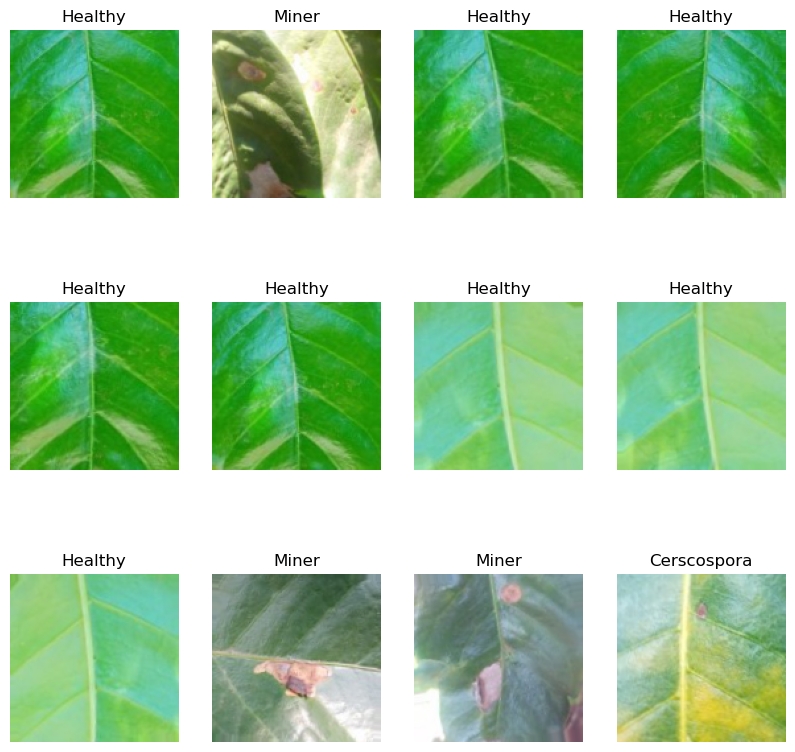

In [19]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the train generator
image_batch, labels_batch = next(train_generator)

# Display the first 12 images from the batch
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i])
    plt.title(class_names[int(labels_batch[i])])
    plt.axis("off")
plt.show()


In [21]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.42284587 0.7605565  0.47359842]
  [0.41176474 0.7568628  0.45838293]
  [0.41176474 0.75707555 0.45076764]
  ...
  [0.43503585 0.7296701  0.26795816]
  [0.43527892 0.729427   0.2667428 ]
  [0.43574983 0.7294118  0.26666668]]

 [[0.4235751  0.7607844  0.4745555 ]
  [0.41183305 0.7568855  0.4589146 ]
  [0.41176474 0.7568628  0.45104104]
  ...
  [0.4426056  0.7294118  0.26666668]
  [0.44309175 0.7294118  0.26666668]
  [0.4437982  0.72963214 0.26644635]]

 [[0.42430434 0.7607844  0.47528473]
  [0.41256225 0.75712866 0.4598869 ]
  [0.41176474 0.7568628  0.45152718]
  ...
  [0.45408183 0.73306    0.2630185 ]
  [0.45481107 0.73330307 0.26277542]
  [0.454902   0.73290783 0.2629579 ]]

 ...

 [[0.6137714  0.8967626  0.6509804 ]
  [0.61586815 0.8981605  0.6508895 ]
  [0.6173266  0.8991328  0.6501603 ]
  ...
  [0.5924303  0.83948916 0.631646  ]
  [0.59634435 0.84260565 0.6350283 ]
  [0.59948343 0.8347776  0.63033944]]

 [[0.63789386 0.9128443  0.63987666]
  [0.63914746 0.9136117  0.63894254]


## Building the Model

In [23]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # Removed two Conv2D and MaxPooling2D layers to ensure feature map is large enough
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,781 (1.36 MB)

 Trainable params: 355,781 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
41185/32

1287.03125

In [31]:
5882/32

183.8125

In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch=1287,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=183,
    verbose=1,
    epochs=80,
)

Epoch 1/80


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 657s 507ms/step - accuracy: 0.8597 - loss: 0.3722 - val_accuracy: 0.9797 - val_loss: 0.0588
Epoch 2/80
   1/1287 ━━━━━━━━━━━━━━━━━━━━ 2:33 120ms/step - accuracy: 0.9062 - loss: 0.1859

C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.9062 - loss: 0.0930 - val_accuracy: 1.0000 - val_loss: 7.6196e-04
Epoch 3/80
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 351s 272ms/step - accuracy: 0.9905 - loss: 0.0308 - val_accuracy: 0.9952 - val_loss: 0.0146
Epoch 4/80
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/80
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 349s 270ms/step - accuracy: 0.9902 - loss: 0.0320 - val_accuracy: 0.9950 - val_loss: 0.0219
Epoch 6/80
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.9688 - loss: 0.0381 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 7/80
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 315s 244ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9998 - val_loss: 3.2315e-04
Epoch 8/80
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 1.0000 - loss: 2.9333e-05 - val_accuracy: 1.0000 - val_loss: 6.4206e-06
Epoch 9/80
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 335s 260ms/step - accuracy

In [35]:
scores = model.evaluate(test_generator)

368/368 ━━━━━━━━━━━━━━━━━━━━ 100s 273ms/step - accuracy: 0.9909 - loss: 0.0207


In [37]:
scores

[0.02286941558122635, 0.9917601346969604]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [39]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [41]:
history.params

{'verbose': 1, 'epochs': 80, 'steps': 1287}

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [53]:
type(history.history['loss'])

list

In [47]:
len(history.history['loss'])

80

In [49]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.16585396230220795,
 0.092934250831604,
 0.02350389026105404,
 0.0017306337831541896,
 0.03300512954592705]

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [55]:
val_acc

[0.9796789884567261,
 1.0,
 0.9952185750007629,
 1.0,
 0.9950478076934814,
 1.0,
 0.9998292326927185,
 1.0,
 0.9972677826881409,
 1.0,
 0.9871926307678223,
 0.9615384340286255,
 1.0,
 1.0,
 0.9998292326927185,
 1.0,
 0.9976093173027039,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9976093173027039,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.993510901927948,
 1.0]

In [57]:
acc

[0.9400772452354431,
 0.90625,
 0.9932447075843811,
 1.0,
 0.9909848570823669,
 0.96875,
 0.9985906481742859,
 1.0,
 0.9937549829483032,
 1.0,
 0.9977158308029175,
 0.9375,
 0.9980560541152954,
 1.0,
 0.9999514222145081,
 1.0,
 0.9959176778793335,
 1.0,
 0.9997813105583191,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9947755932807922,
 1.0,
 0.9990280270576477,
 1.0,
 0.9996111989021301,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9976186156272888,
 1.0]

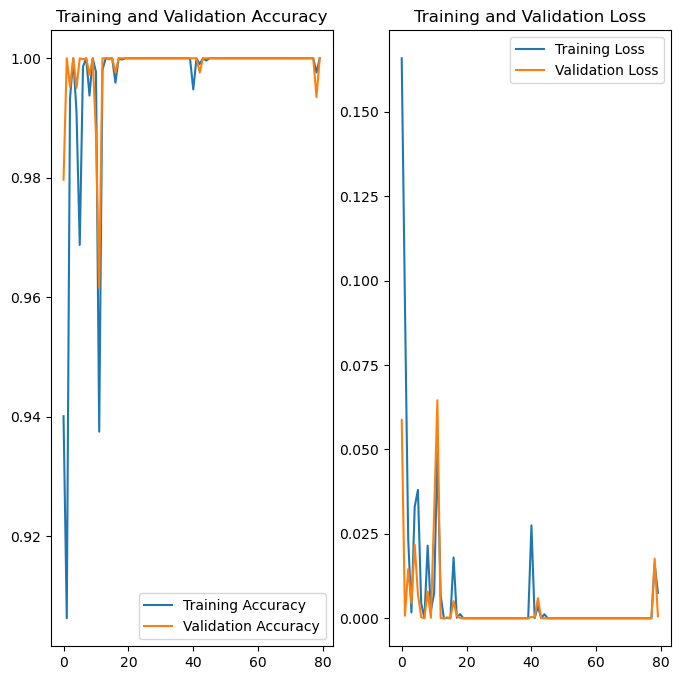

In [59]:
EPOCHS = 80

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

First image to predict
Actual label: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted label: Healthy


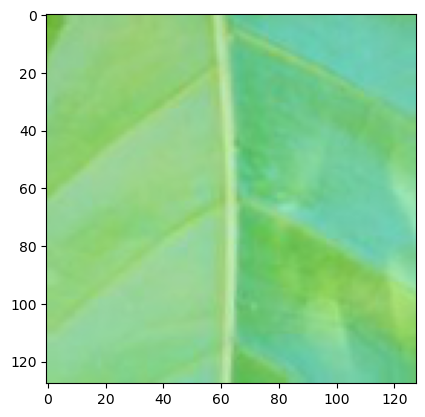

In [61]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  # Corrected the variable name
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Corrected the function to take an image as input
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


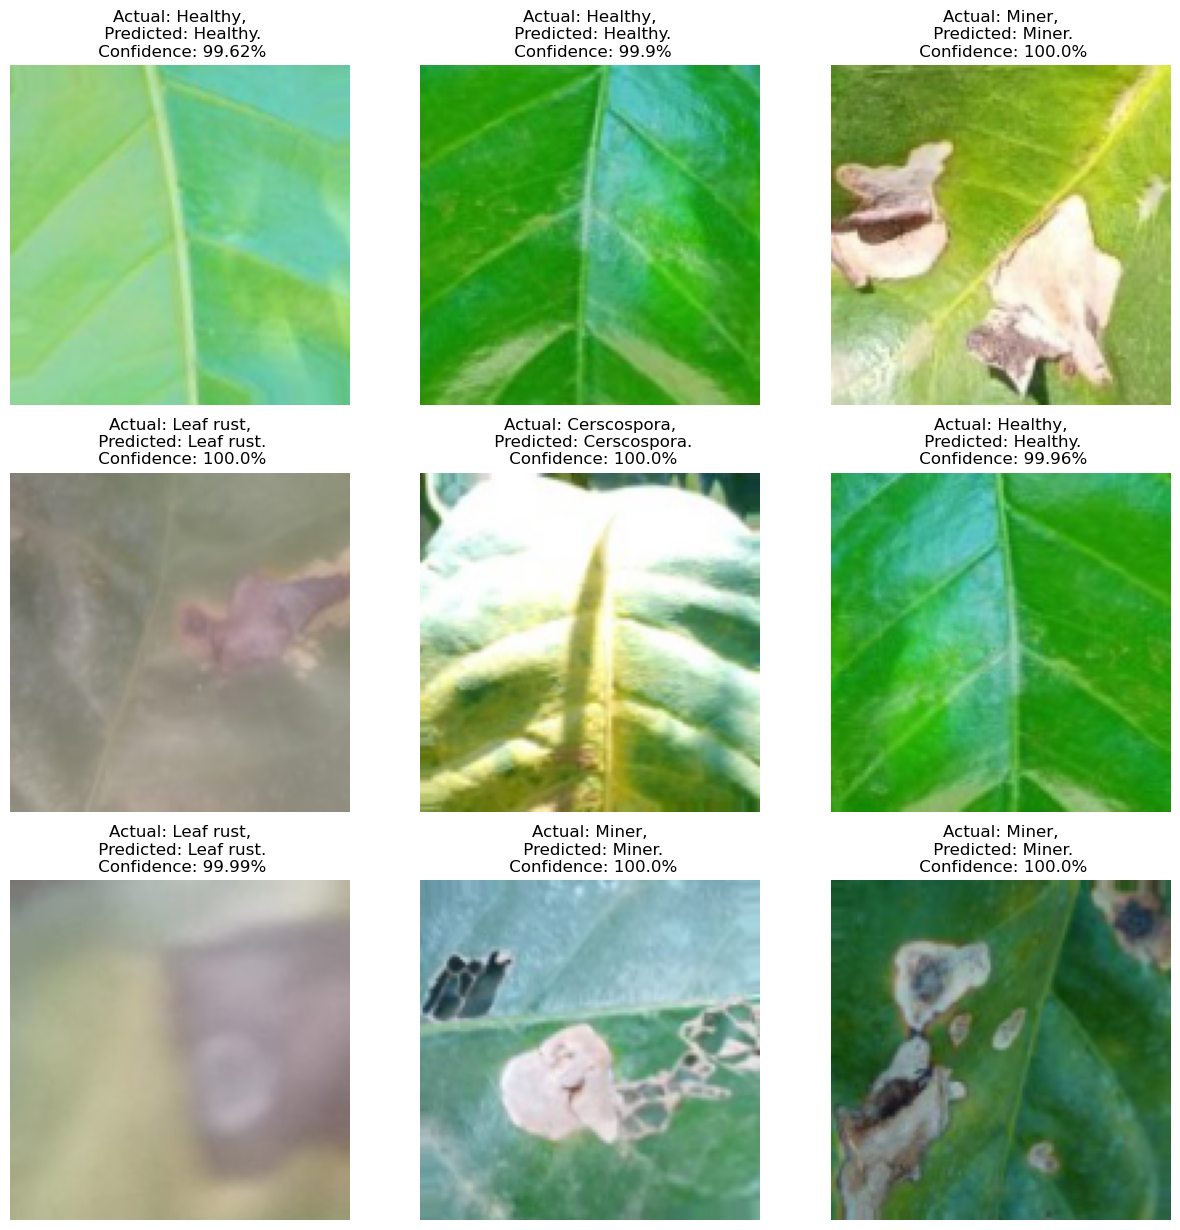

In [71]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model



In [69]:
model.save("../saved_models/coffee3.keras")